# Speed Dating

## Contents
1) **Basic dataset statistics**

2) **Demographics of study participants**
- Age distribution by gender
- Study fields by gender
- Intended careers by gender


3) **Participants' motivation and outcomes**
- Did men and women have similar motivation?
- How many couples matched?
- Is it easier for a woman to find a partner than for a man?

4) **What makes people interested in each other?**
- Is age difference a problem for a match?
- Is is important to study in the same field?
- Is it important to have similar professional plans?
- Is it important to have similar interests?
- Is it dimportant to socialize to be successsful in dating?
- What matters more: intelligence, attraction or having fun?

5) **Conclusion**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np

# The following lines allow visualising all rows and all columns of an output if necessary
#pd.set_option("max_seq_items", None)
#pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [2]:
def cols_with_mixed_data_types(df):
    # Function that prints the names of columns with containing more than one data type:
    for column in df.columns:
        if len(df[column].map(type).unique())>1:
            print(f"{column}: {df[column].map(type).unique()}")

In [3]:
def transfer_values_by_id(df, participant_id, partner_id, source_col, target_col):
    # Function for transferring values from the row of a participant 
    # to the row of their partners during the speed dating experiment

    # df: dataframe name
    # participant_id: column name with participants' unique id ('iid') as string
    # partner_id: column name with partners' unique id ('pid') as string
    # source_col: the column that contain the value that is to be transferred to another row
    # target_col: the newly created column in the participants row that will contain the value from the partner's row

    # Creating a column in the dataframe that for each row will contain values transferred from another row
    df[target_col] = None
    partner_id_list = df[partner_id]
    for i in range(0, len(df)):
        # Iterating over all unique participants IDs ('iid') who also appear as in the dataset other people's partners ('pid')
        if df.loc[i, participant_id] in partner_id_list:
            # Retrieving the value of interest from the source column
            partner_value = df.loc[i, source_col]
            # Saving the list of indexes of rows where the participant ('iid') above has the role of a partner ('pid') of another person
            partner_indexes = df.index[df[partner_id] == df.loc[i, participant_id]].tolist()
            # For each row where a given participan is someone's partner, we insert the value of interest into target column.
            for j in partner_indexes:
                df.loc[j, target_col] = partner_value
        else:
            pass

## Basic dataset statistics

In [4]:
# Importing dataset
df = pd.read_csv("data\speed_dating_data.csv", encoding = "ISO-8859-1")

In [5]:
# Getting a look at the first rows of the dataset
display(df.head())

print("Number of rows in the dataset:", len(df))

# Basic statistics
df.describe()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


Number of rows in the dataset: 8378


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000
max,552.000000,22.000000,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.000000,...,12.000000,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [6]:
# Checking data types in columns
df.dtypes

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object

In [7]:
# Checking whether any columns have several data types
cols_with_mixed_data_types(df)

field: [<class 'str'> <class 'float'>]
undergra: [<class 'float'> <class 'str'>]
mn_sat: [<class 'float'> <class 'str'>]
tuition: [<class 'float'> <class 'str'>]
from: [<class 'str'> <class 'float'>]
zipcode: [<class 'str'> <class 'float'>]
income: [<class 'str'> <class 'float'>]
career: [<class 'str'> <class 'float'>]


In [8]:
# Checking the percentage of missing values per column
missing_values_series = 100*df.isnull().sum()/df.shape[0]
# (Commented to avoid long output)
#missing_values_series

There are a lot of missing values in the dataset. For the purposes of the further analysis, we will only include columns where at least 70% of values are not missing.

In [9]:
# Storing the names of the columns with no more than 30 % of missing values as a list
valid_columns_list = []
for i in range(0, len(missing_values_series.index)):
    if missing_values_series[i]<=30:
        valid_columns_list.append(missing_values_series.index[i])


print(valid_columns_list)

# Recreating the datafarme with the selected columns only
df = df[valid_columns_list]

['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig', 'from', 'zipcode', 'goal', 'date', 'go_out', 'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 

## Demographics of study participants

The participans to the experiment  were drawn from students in graduate and professional schools at Columbia University. Each participant in the study had a unique number ("iid"). The original dataset contains several rows for each iid, each row corresponding to a different partner that the person with the given iid met during speed dating. 

I grouped the dataset by the iid in order to count the number of unique participants in the study.

In [10]:
df_iid = df.groupby("iid").mean(numeric_only=True).reset_index(drop=False)

print(f"Total number of participants in this study: {len(df_iid)}")

Total number of participants in this study: 551


In the dataset, the column "gender" contains information whether the participant was male (1) or female (0). To avoid confusion, I chose to create a column "gender_name" where the gender of each participant is indicated explicitly as "Male" or "Female".

In [11]:
df_iid["gender_name"] = df_iid['gender'].apply(lambda x: "Male" if x==1 else "Female")

# Checking the result
df_iid[['iid', 'gender', 'age', 'gender_name']].loc[8:12]

,iid,gender,age,gender_name
8,9,0.0,26.0,Female
9,10,0.0,26.0,Female
10,11,1.0,27.0,Male
11,12,1.0,22.0,Male
12,13,1.0,22.0,Male


In [12]:
# Using masks to count male and female participants in the study
nb_women = len(df_iid[df_iid["gender_name"] == "Female"])
nb_men = len(df_iid[df_iid["gender_name"] == "Male"])
print(f"There were {nb_men} male participants and {nb_women} female participants in the study.")

There were 277 male participants and 274 female participants in the study.


### Age distribution by gender
I used plotly express library to visualise the the distribution of ages of the men and the women who participated in the study.

In [13]:
fig = px.box(df_iid, x="gender_name", y="age", color="gender_name", color_discrete_sequence=["#F78FE4", "#0460C9"])
fig.show()

It looks like the ages of men and women who participated in the study were quite similar, though the median age of men (27) is slightly greater than for the median age of women (26 years). Almost all men have ages between 18 and 37 and almost all women have ages between 19 and 35, with only 3 men and 3 women having ages outside this range.

### Study fields by gender
I found that the fields of study chosen by the authors were too detailed to get a general overview of participants' distribution per field of study.  For this reason, I chose to regroup some fields into more general categories similar to the system used by the French ONISEP ("Office national d'information sur les enseignements et les professions") so that the categories more understandable for a reader from France.

In [14]:
df['domain_of_study'] = df["field_cd"].apply(lambda x: "Arts" if x==14 or x==15
                                                    else "Economy and Management" if x==8
                                                    else "Sciences" if x==2 or x==5 or x ==10
                                                    else "Medicine, Pharma, Biotech" if x==4
                                                    else "Education, Academia" if x==9
                                                    else "Law and Political Science" if x==1 or x==13
                                                    else "Literature and Languages" if x==6 or x ==16
                                                    else "Social Sciences, Humanities, Psychology" if x==3 or x==7
                                                    else "Education, Academia" if x==9
                                                    else "Social Work" if x==11
                                                    else "Architecture" if x==17
                                                    else "Undergrad / Undecided" if x==12
                                                    else "Other" if x==18
                                                    else None)

Visualising percentage of experiment participants by domain of study

In [15]:
# Calculating percentage of participants belonging to each domain
df['percent'] = df.groupby('domain_of_study')['domain_of_study'].transform('count') / df['domain_of_study'].count() * 100

# Creating horizontal bar chart
fig = go.Figure()
for i, domain in enumerate(df['domain_of_study'].unique()):
    fig.add_trace(go.Bar(
        x=df[df['domain_of_study'] == domain]['percent'],
        y=[domain],
        orientation='h',
        name=domain,
        text=df[df['domain_of_study'] == domain]['percent'].apply(lambda x: f'{x:.2f}%'),
        textposition='inside',
        marker_color='#8B43D7',
        opacity = 0.7)
    )

fig.update_layout(
    barmode='stack',
    uniformtext_minsize=5,
    autosize=True,
    xaxis_title='Percentage',
    yaxis_title='Domain of Study',
    yaxis={'categoryorder': 'total ascending'},
    showlegend=False
)

fig.show()

The four most represented domains amont the study participants are : (1) Sciences, (2) Economy and Management, (3) Law and Political Sciences, and (4) Social Sciences, Humanities, Psychology. These domains regroup more than 75 % of the participants for whom the field of study is known.

Let us compare whether the two genders are equally represented in all the domains of study.

In [16]:
df_iid['domain_of_study'] = df_iid["field_cd"].apply(lambda x: "Arts" if x==14 or x==15
                                                    else "Economy and Management" if x==8
                                                    else "Sciences" if x==2 or x==5 or x ==10
                                                    else "Medicine, Pharma, Biotech" if x==4
                                                    else "Education, Academia" if x==9
                                                    else "Law and Political Science" if x==1 or x==13
                                                    else "Literature and Languages" if x==6 or x ==16
                                                    else "Social Sciences, Humanities, Psychology" if x==3 or x==7
                                                    else "Education, Academia" if x==9
                                                    else "Social Work" if x==11
                                                    else "Architecture" if x==17
                                                    else "Undergrad / Undecided" if x==12
                                                    else "Other")

In [17]:
# Creating a temporary dataframe with two columns only
temp_df = df_iid[["domain_of_study", "gender_name"]]

# Counting the number of men and women representing each domain
gender_by_domain_series = temp_df.groupby(["domain_of_study", "gender_name"]).size()

# Saving the result as the dataframe with 'size' column containing the number of representatives per gender
gender_by_domain_df = gender_by_domain_series.to_frame(name = 'size').reset_index()

# Checking the resulting dataframe
display(gender_by_domain_df.head())

,domain_of_study,gender_name,size
0,Architecture,Male,1
1,Arts,Female,12
2,Arts,Male,6
3,Economy and Management,Female,30
4,Economy and Management,Male,100


In [18]:
# Creating a dataframe that will contain the number of representatives (men + women) per domain of study
nb_by_domain_df = gender_by_domain_df.groupby('domain_of_study').sum(numeric_only=True)

# Calculatiing percentage of each gender for each domain of study
gender_by_domain_df['gender_percent_by_domain'] = gender_by_domain_df.apply(lambda row: round(row['size']/
                                                                            nb_by_domain_df.loc[row['domain_of_study']][0] * 100, 1),
                                                                            axis=1)

gender_by_domain_df.sort_values(by=['gender_percent_by_domain'], inplace=True)

# Checking the resulting dataframe
gender_by_domain_df.head()

,domain_of_study,gender_name,size,gender_percent_by_domain
20,Social Work,Male,1,3.3
6,"Education, Academia",Male,5,12.5
12,"Medicine, Pharma, Biotech",Male,2,22.2
3,Economy and Management,Female,30,23.1
10,Literature and Languages,Male,6,25.0


In [19]:
# Visualising the percentage of men and women per domain of study
fig=px.bar(gender_by_domain_df, 
           x='gender_percent_by_domain', 
           y='domain_of_study',
           color=gender_by_domain_df['gender_name'],
           barmode ='stack',
           color_discrete_sequence=["#1179f0", "#F78FE4"],
           opacity = 0.75,
           text = gender_by_domain_df['gender_percent_by_domain'].astype(str) + " %")

fig.update_yaxes(categoryorder = "total ascending")

fig.update_traces(textfont_color='#ffffff')

fig.show()

As for the four most represented domains of study seen before, there are noticeably more men than women in Sciences as well as Economy and Management, and noticeably more women in the Social Sciences, Humanities and Psychology domain. In Law and Political Science, men and women are nearly equally represented.

### Intended careers by gender

Let us use the *plotly.graph_objects* library to create donut charts representing distribution of intended careers by gender.

In [20]:
# Creating a column with the name of the professional domain based on the career code
df_iid['intended_career'] = df_iid["career_c"].apply(lambda x: "Law" if x==1
                                                    else "Academic / Research" if x==2
                                                    else "Psychology" if x==3
                                                    else "Medicine" if x==4
                                                    else "Engineering" if x==5
                                                    else "Arts & Entertainment" if x==6
                                                    else "Business & Finance" if x==7
                                                    else "Real Estate" if x==8
                                                    else "International / Humanitarian Affairs" if x==9
                                                    else "Undecided" if x==10
                                                    else "Social Work" if x==11
                                                    else "Speech Pathology" if x==12
                                                    else "Politics" if x==13
                                                    else "Sports" if x==14
                                                    else "Other" if x==15
                                                    else "Journalism" if x==16
                                                    else "Architecture" if x==17
                                                    else None)

In [21]:
# Grouping by gender and career and counting occurrences
career_by_gender = df_iid.groupby(['gender_name', 'intended_career']).size().reset_index(name='count')

# Filtering by gender to create two separate dataframes for men and women
male_df = career_by_gender[career_by_gender['gender_name'] == 'Male']
female_df = career_by_gender[career_by_gender['gender_name'] == 'Female']

# Creating subplots
specs = [[{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=1, cols=2, specs=specs, subplot_titles=('Men', 'Women'))

# Adding pie charts to subplots
fig.add_trace(go.Pie(values=male_df['count'], labels=male_df['intended_career'], name='Men', hole=0.55), 1, 1)

fig.add_trace(go.Pie(values=female_df['count'], labels=female_df['intended_career'], name='Women', hole=0.55), 1, 2)

# Adding annotations
fig.update_layout(title='Intended careers by gender', 
                  annotations=[
                    dict(text='Men', x=0.22, y=0.45, font_size=25, showarrow=False),
                    dict(text='Women', x=0.78, y=0.45, font_size=25, showarrow=False)
                    ])

fig.show()

The two most popular professional domains are (1) Business & Finance and (2) Academic / Research. Men are more likely to plan working in business and finance (38 % vs 15.1 %  for women), while more women intend to work in Academic / Research domain (32.5 % vs 24.1 % for men). The third most popular career for men is Law, while the third most popular domain for women is Arts & Entertainment. Law is only in the 5th place by popularity for women.

## Participants' motivation and outcomes

### Did men and women have similar motivation?
Let us explore now the motivation of the participants of the experiment and whether it was different for men and women.

In [22]:
# Restoring the textual description of the participants' motivations based on codes
df_iid['participant_goal'] = df_iid["goal"].apply(lambda x: "Seemed like a fun night out" if x == 1 
                                                    else "To meet new people" if x == 2 
                                                    else "To get a date" if x == 3 
                                                    else "Looking for a serious relationship" if x == 4 
                                                    else "To say I did it" if x==5 
                                                    else "Other")

In [23]:
# Comparing the percentage of men and women that expressed one of the motivations
fig = px.histogram(df_iid,
                   y="participant_goal",
                   color='gender_name', 
                   barmode='group', 
                   color_discrete_sequence=["#F78FE4", "#1179f0"],
                   opacity=0.70, histnorm = 'percent')

fig.update_yaxes(categoryorder = "total ascending")

fig.update_xaxes(title_text='percent')

fig.show()

It looks like most participants were motivated by the opportinity to socialize (the variants "a fun night out" or "to meet new people" were chosen by almost 73 % of men and more than 78 % of women). At the same time, men had more expectations from the event than women: almost 10 % of men wanted to get a date (compared to 4.7 % of women), and 4.7 % of men were looking for a serious relatioship (compared to 3.3 % of women).

### How many couples matched?

Let us look now at the outcomes of speed dates.

Among all couples that met during the speed dating experiment, how many couple matched (i.e. each of the members of the couple liked the other one)?

In [24]:
# Saving the columns of interest in 
match_df=df[["iid", "pid", "match"]]

# Removing duplicate couples 
# (ex. if one row in contains 'iid' = 1 and 'pid'=11 and another row contains 'iid' = 11 and 'pid' = 1,
# this is in fact the same couple and is is sufficient to keep only one of the rows).
match_df = match_df.groupby(match_df.apply(frozenset, axis=1)).first()

# Modifying the values in the 'match' column to make them more explicit
match_df["match"] = match_df["match"].apply(lambda x: "Yes" if x ==1 else "No")

# Grouping by match and counting the number of matches and non-matches
grouped_match_df = match_df.groupby('match').size().reset_index(name='count')

# Calculating the percentage of matches and non-mathes
grouped_match_df['percentage'] = grouped_match_df['count'].apply(lambda x: x / grouped_match_df['count'].sum())

In [25]:
# Visualising percent of matches on a pie chart
fig = px.pie(grouped_match_df,
             values='percentage',
             names='match', 
             color_discrete_sequence=['lightgrey', 'green'],
             title='Match Ratio')

fig.show()

It turns out that matches happend only for 16.5 % of the total number of speed dates during the experiment.

### Is it easier for a woman to find a partner than for a man?

It is a common assumption that it is easier for a woman to find male partners on a dating app like Tinder than vice versa. Let us check whether this assumption is corroborated by the results of the experiment.

Among all couples that met during the experiment, what is the percent of speed dates where the woman was liked and what is the percent of speed dates where the man was liked?

In [26]:

# Creating column with explicit values for gender to avoid confusion of codes
df["gender_name"] = df['gender'].apply(lambda x: "Male" if x==1 else "Female")

# Creating column with explicit values for decisions taken by a participant's partner (column 'dec_o')
df['liked_by_partner'] = df['dec_o'].apply(lambda x: 'liked' if x == 1 else "not liked")

# Creating two dataframes with the count of positive decisions ("likes") received for each gender
df_female = df[df['gender_name'] == 'Female'].groupby(['liked_by_partner']).size().reset_index(name='counts')
df_male = df[df['gender_name'] == 'Male'].groupby(['liked_by_partner']).size().reset_index(name='counts')

# Calculate the percentage of positive decisions received by representatives of each gender
female_liked_percent = round(100 * df_female[df_female['liked_by_partner'] == 'liked']['counts'].iloc[0] / df_female['counts'].sum(), 2)
male_liked_percent = round(100 * df_male[df_male['liked_by_partner'] == 'liked']['counts'].iloc[0] / df_male['counts'].sum(), 2)


In [27]:
# Defining colors
female_colors = ['deeppink', 'lightgrey']
male_colors = ['deepskyblue', 'lightgrey']

# Creating subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]],
                    subplot_titles=['Percentage of women liked: {}%'.format(female_liked_percent),
                                    'Percentage of men liked: {}%'.format(male_liked_percent)])

# Adding pie charts to the subplots
fig.add_trace(go.Pie(labels=df_female['liked_by_partner'], values=df_female['counts'], name="",
                      marker=dict(colors=female_colors), showlegend=False), 1, 1)
fig.add_trace(go.Pie(labels=df_male['liked_by_partner'], values=df_male['counts'], name="",
                      marker=dict(colors=male_colors), showlegend=False), 1, 2)

# Adding annotations
fig.update_layout(annotations=[dict(text='Females liked by partner', x=0.2, y=-0.1, font=dict(size=14)),
                               dict(text='Males liked by partner', x=0.8, y=-0.1, font=dict(size=14))])

# Adding title
fig.update_layout(title_text="Proportion of likes received", title_font_size=20)

fig.show()

It does look like that women are liked more often than men: on the average, women were liked by their partners in almost half of the speed dates, while men were liked by their partner in only 36.5 % of speed dates.

## What makes people interested in each other?

In order to check whether whether age difference influences the probability of a match, we will create the column 'age_difference' that will show the absolute value of the age difference between the partners.

In [28]:
df['age_difference']=abs(df['age']-df['age_o'])

We will also create a column showing whether participants and their partners intended to have careers in the same domain.

In [29]:
# Creating a new column 'partner_career_code' and transfering career code for each partner of a participant
transfer_values_by_id(df, 'iid', 'pid', 'career_c', 'partner_career_code')

# Creating a new column 'same_career'
df['same_career'] = None

# Checking whether the participant ('iid') and their partner on a speed date ('pid') had the same career code
for i in range(0, len(df)):
    df.loc[i, 'same_career'] = 1 if df.loc[i, 'career_c']==df.loc[i, 'partner_career_code'] else 0

In a similar manner, let us create a column showing whether participants and their partners studied in the same domain.

In [30]:
# Creating a new column 'partner_career_code' and transfering career code for each partner of a participant
transfer_values_by_id(df, 'iid', 'pid', 'domain_of_study', 'partner_domain_of_study')

# Creating a new column 'same_career'
df['same_domain_of_study'] = None

# Checking whether the participant ('iid') and their partner on a speed date ('pid') had the same career code
for i in range(0, len(df)):
    df.loc[i, 'same_domain_of_study'] = 1 if df.loc[i, 'domain_of_study']==df.loc[i, 'partner_domain_of_study'] else 0

For some columns, the information will be the same for the same couple of ids: e.g. a row where a participant's unique id ('iid') is **1** and their partner's unique id ('pid') is **11** will contain the same information for columns 'int_corr' (correlation between participant’s and partner’s ratings of interests at the time of signup for the experiment), 'age_difference', 'same_career', 'same_domain_of_study' as the row with 'iid' is **11** and 'pid' is **1**. This means that for these columns the information is actually duplicated in the table. For such columns, we will only keep one row per couple.

In [31]:
couples_df=df[["iid", "pid", "match", "int_corr", 'age_difference', 'same_career', 'same_domain_of_study']]

couples_df = couples_df.groupby(couples_df.apply(frozenset, axis=1)).first()

couples_df = couples_df.sort_values(by = 'iid')

couples_df.reset_index(drop = True).head()

,iid,pid,match,int_corr,age_difference,same_career,same_domain_of_study
0,1,11.0,0,0.14,6.0,0,0
1,1,19.0,1,0.28,7.0,0,0
2,1,18.0,0,0.50,6.0,0,0
3,1,17.0,0,0.34,9.0,0,1
4,1,16.0,0,0.25,4.0,0,0


### Is age difference a problem for getting a match?

In [32]:
# Creating a box plot using plotly.express
fig = px.box(couples_df, x='match', y='age_difference', color='match', color_discrete_map={0 :'grey', 1 :'green'})

# Setting axis labels and title
fig.update_layout(
    xaxis=dict(title='Match'),
    yaxis=dict(title='Age difference'),
    title='Match by age difference'
)

fig.show()

It looks like in most of cases, the age difference between partners matters little (the median difference in ages being 1 both for couples who matched and for those who did not match). At the same time, among the couple who match, maximum age difference is 17 years, while all couples were difference was greater, did not match.

### Is it important to study in the same field?
We will use a contingency table to determine the percentage of matches and non-matches for couples where partners studied in the same or in different fields. We will use the seaborn library to display the contingency table in the form of a heatmap.

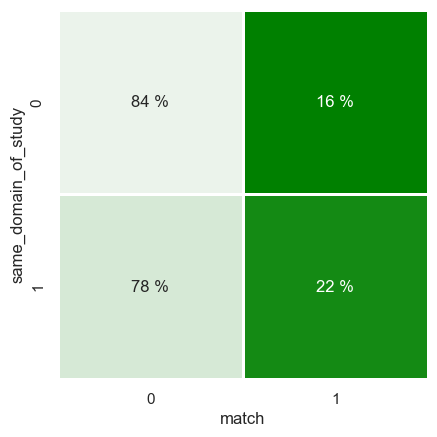

In [33]:
cmap = sns.light_palette("green", as_cmap=True, reverse=True)

sns.set()
fig, ax0 = plt.subplots(1,1)
career_cont_table = pd.crosstab(index=couples_df['same_domain_of_study'], columns=couples_df['match'], normalize='index')*100
ax = sns.heatmap(career_cont_table, annot=True, cmap=cmap, square=1, linewidth=1., cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

Couples where both partners study in the same field have better chances to match (22%) than couples where partners study in different fields (16 %).

### Is it important to have similar professional plans?
In a similar manner, we will compare couples where both partners intend to have career in the same field with the couples that intend to have careers in different fields.

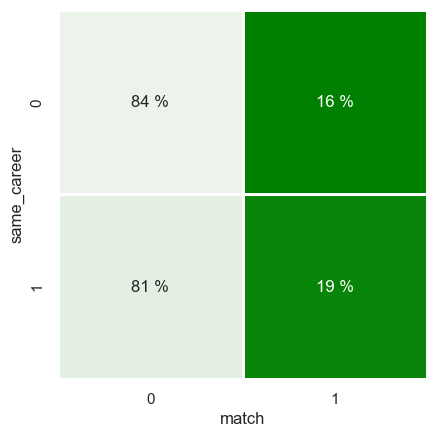

In [34]:
sns.set()
fig, ax0 = plt.subplots(1,1)
career_cont_table = pd.crosstab(index=couples_df['same_career'], columns=couples_df['match'], normalize='index')*100
ax = sns.heatmap(career_cont_table, annot=True, cmap=cmap, square=1, linewidth=1., cbar=False)
for t in ax.texts: t.set_text(t.get_text() + " %")
plt.show()

### Is it important to have similar interests?
The authors of the study have asked participants to rate their interest in activities such playing sports, dining out, reading, watching TV etc. and calculated the correlation of interests for each couple. Let us see whether such interests are important in getting a match during speed dating.

In [35]:
# create a box plot using plotly.express
fig = px.box(couples_df, x='match', y='int_corr', color='match', color_discrete_map={0 :'grey', 1 :'green'})

# set axis labels and title
fig.update_layout(
    xaxis=dict(title='Match'),
    yaxis=dict(title='Correlation of interests'),
    title='Match and correlation of interests'
)

# show the plot
fig.show()

The median correlation of interests is higher for the couples who matched (0.25 compared to 0.21 for couples that did not match).

### Is it important to socialize to be successful in dating?

Before the experiment, the authors of the study asked the participants to answer the following question:

"In general, how frequently do you go on dates?
- Several times a week=1
- Twice a week=2
- Once a week=3
- Twice a month=4
- Once a month=5
- Several times a year=6
- Almost never=7"

Let us look whether the chance of being liked during a date is correlated with the the number of dates a person supposedly has outside of the experiment.

As the different choices are ordered (smaller numbers mean greater frequency of dates and vice versa) and the target variable is binary (a person is either liked or not), I used the *lnplot* function from the *seaborn* library to plot the logistic regression for both genders.


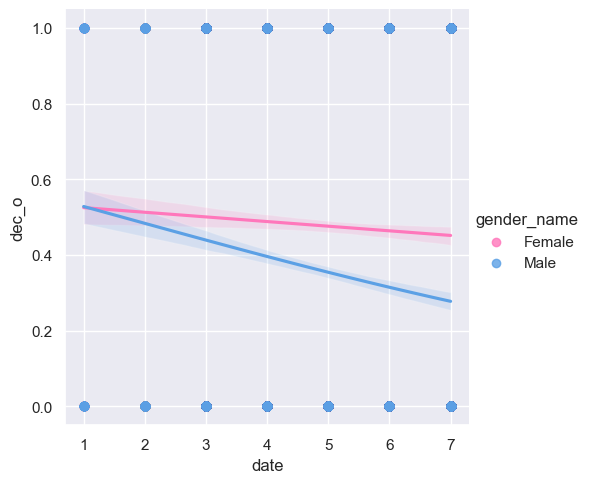

In [36]:
gender_palette = sns.color_palette(["#ff77bb", "#5ba0e5"])
sns.lmplot(x="date", y="dec_o", data=df, hue = "gender_name", logistic=True, palette = gender_palette)

The less dates a person claims to have, the less likes the person obtained during the speed dating event. At the same time, this effect is much more noticeable for men: the men who date most frequently have more than 0.5 possibility to be be liked while men who date least frequently have only 0.3 possibility to be liked.

The authors of the study also wanted to see whether other going out in general was important for dating, so they asked the participants to answer the following question: 

"How often do you go out (not necessarily on dates)?
- Several times a week=1
- Twice a week=2
- Once a week=3
- Twice a month=4
- Once a month=5
- Several times a year=6
- Almost never=7"

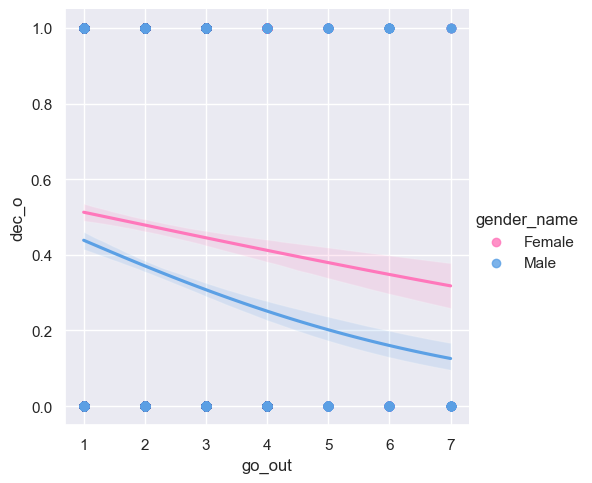

In [37]:
sns.lmplot(x="go_out", y="dec_o", data=df, hue = "gender_name", logistic=True, palette = gender_palette)

Going out often is also correlated with being liked during dating: the less a person a goes out, the less likes he or she gets. It is still visible that men are on average less successful in getting likes from women than vice versa.

### What matters more: intelligence, attraction or having fun?

Let us now have a look at the importance of attraction, intelligence and fun for being liked by the opposite gender. 
The columns 'attr3_1', 'intel3_1', 'fun3_1' contain, for each participant, their note for their own attraction, intelligence and fun (on the 1 to 10 scale).
The columns 'attr_o', 'intel_o', 'fun_o' contain, for each participant, the note for their attraction, intelligence and fun as given by their dating partner (on the 1 to 10 scale).
The column 'dec_o' contains information whether the partner liked the participant or not.

We will now have a look at the correlation of these notes and try to understand what are the most important ones and whether there are differences in preferences between men and women.


Let us first look at the opinions of women about themselves and at men's opinions about women.

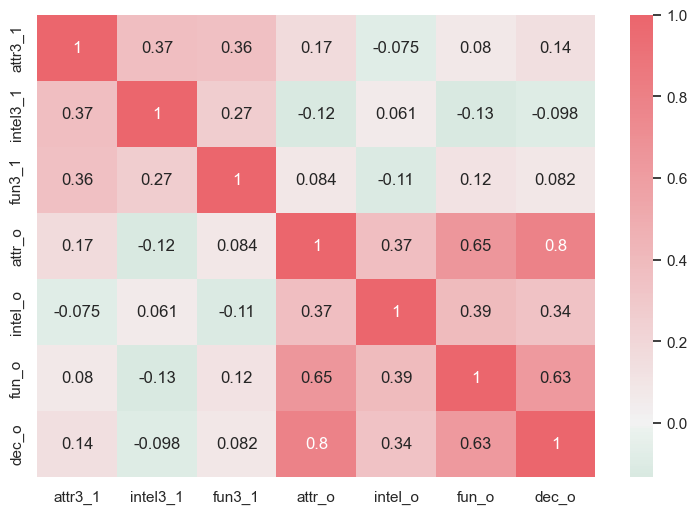

In [38]:

female_iid_df = df_iid[df_iid['gender_name']=='Female']

# Calculate the correlation matrix
female_corr = female_iid_df[['attr3_1', 'intel3_1', 'fun3_1', 'attr_o', 'intel_o', 'fun_o', 'dec_o']].corr()
f, ax = plt.subplots(figsize=(9, 6))
palette = sns.diverging_palette(h_neg=150, h_pos=10, l=60, sep=3, as_cmap=True)

# Plot the heatmap
sns.heatmap(female_corr, cmap=palette, annot=True, center=0.00)

plt.show()

Men's positive decisions about women are most strongly correlated with attractiveness, fun and intelligence as appreciated by men themselves. Women's opinions about their characteristics is much less correlated with men's decisions. It is interesting to note a slight negative correlation between women's opinion of her intelligence (intel3_1) and men's positive decision.

Now, let us look at the opinions of men about themselves and at women's opinions about men.

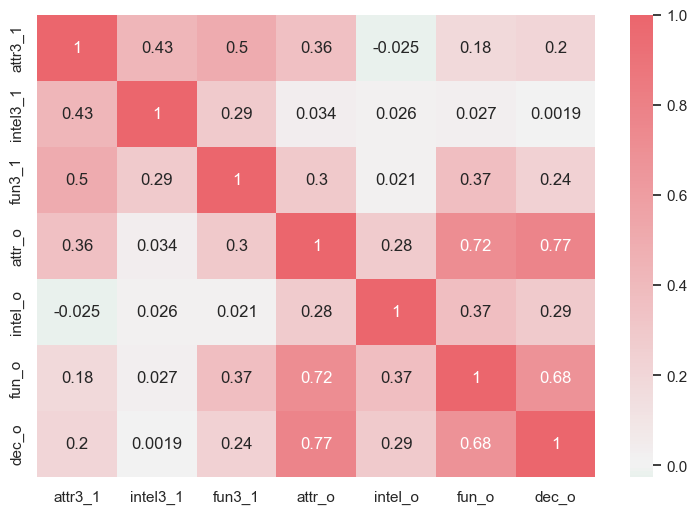

In [39]:
male_iid_df = df_iid[df_iid['gender_name']=='Male']

# Calculate the correlation matrix
male_corr = male_iid_df[['attr3_1', 'intel3_1', 'fun3_1', 'attr_o', 'intel_o', 'fun_o', 'dec_o']].corr()
f, ax = plt.subplots(figsize=(9, 6))

# Plot the heatmap
sns.heatmap(male_corr, cmap=palette, annot=True, center=0.00)

plt.show()

The principal characteristics that are correlated with women's positive decisions are the same as previously seen: attraction, fun and intelligence as appreciated by the woman. It also looks like for women having fun is more important and partner's attraction is less important than they are for men.

## Conclusion

The most important factors that make people interested in each other seem to be:
- Attraction, fun and intelligence as perceived by the partner who makes the decision,
- Social experience such as going out and dating, especially for men,
- Studying in the same field,
- Similar professional plans.

On the contrary, age difference, similarity of interests and people's opinions on their own attraction, fun and intelligence seem to be of lesser importance for getting a match.

At the same time, it should be noted that correlation does not always mean causation: e.g. it is not clear whether it is dating/going out itself makes men more successful at speed dating (by making them more at ease in social situations for example), or whether these men are already more successful at dating for other reasons (physical attraction, sociable character...), so their frequency of dating as well as their success at speed dating are both consequences of these chararacteristics.